In [1]:
import sys

PROJECT_ROOT_ABS_FILEPATH="c:\\Users\\Lenovo\\myFiles\\nauka\\studia\\sem6\\wybrane zagadnienia sztucznej inteligencji\\laby\\analiza_danych"

sys.path.append(PROJECT_ROOT_ABS_FILEPATH)

In [2]:
import matplotlib.pyplot as plt

from corrected_app.general.data_processing import denormalize_data
from corrected_app.general.distance_calculation import get_euclidean_distance, get_manhattan_distance
from corrected_app.general.results_analysis import get_cluster_size, get_avg_distance_from_centroid_in_a_cluster, get_max_distance_from_centroid_in_a_cluster
from corrected_app.healthcare_noshows.healthcare_noshows_loop import healthcare_noshows_loop
from corrected_app.healthcare_noshows.healthcare_noshows_normalization import healthcare_noshows_denormalize_row

## Check the influence of number of clusters

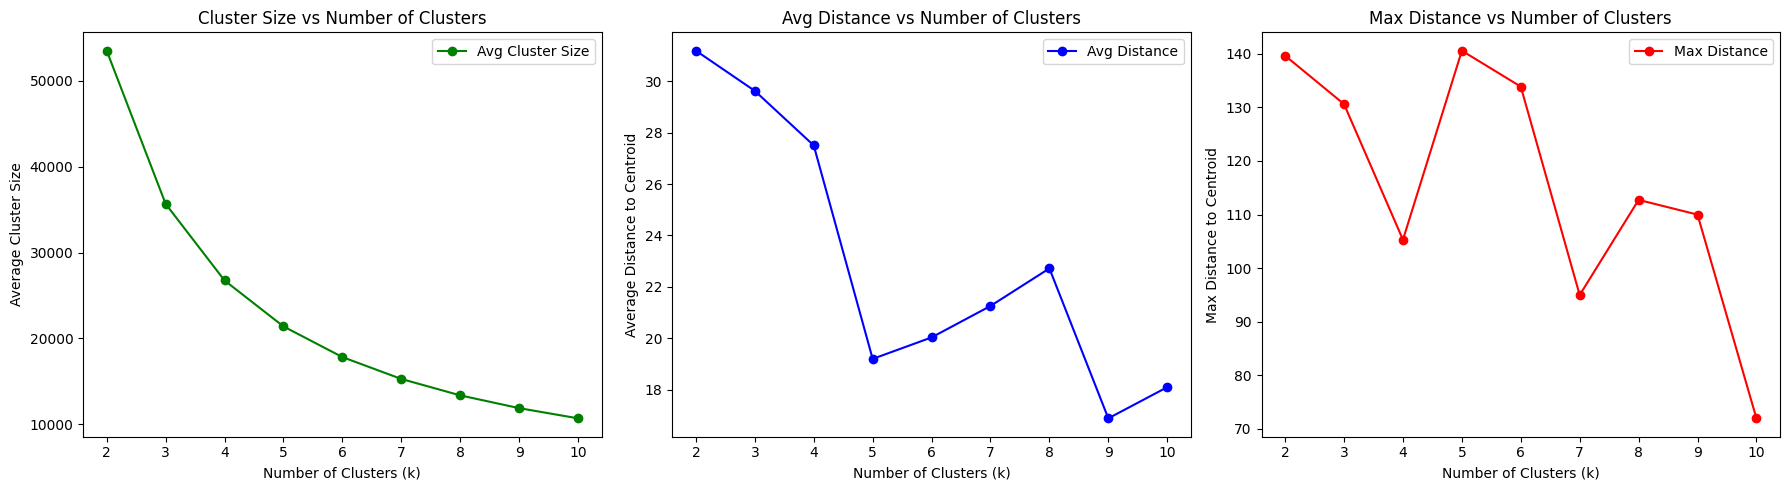

In [3]:
# results for different number of clusters

results = []

for k in range(2, 11):
    clusters, centroids = healthcare_noshows_loop(no_of_iterations=4, no_of_clusters=k, calculate_distance_function=get_euclidean_distance)
    
    cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
    avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_euclidean_distance) for i, cluster in enumerate(clusters)]
    max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_euclidean_distance) for i, cluster in enumerate(clusters)]

    results.append({
        "k": k,
        "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
        "avg_distance": sum(avg_distances) / len(avg_distances),
        "max_distance": max(max_distances)
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ks = [res["k"] for res in results]

# avg cluster size vs number of clusters
avg_cluster_sizes = [res["avg_cluster_size"] for res in results]
axs[0].plot(ks, avg_cluster_sizes, marker='o', linestyle='-', color='g', label="Avg Cluster Size")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Average Cluster Size")
axs[0].set_title("Cluster Size vs Number of Clusters")
axs[0].legend()

# avg distance to centroid vs number of clusters
avg_distances = [res["avg_distance"] for res in results]
axs[1].plot(ks, avg_distances, marker='o', linestyle='-', color='b', label="Avg Distance")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Average Distance to Centroid")
axs[1].set_title("Avg Distance vs Number of Clusters")
axs[1].legend()

# max distance to centroid vs number of clusters
max_distances = [res["max_distance"] for res in results]
axs[2].plot(ks, max_distances, marker='o', linestyle='-', color='r', label="Max Distance")
axs[2].set_xlabel("Number of Clusters (k)")
axs[2].set_ylabel("Max Distance to Centroid")
axs[2].set_title("Max Distance vs Number of Clusters")
axs[2].legend()

plt.tight_layout()
plt.show()


**Conclusion**: Based on the rate of change of slope of average distance from a centroid vs number of clusters, the optimal number of clusters seem to be 5 or 9.

## Check the influence of number of iterations

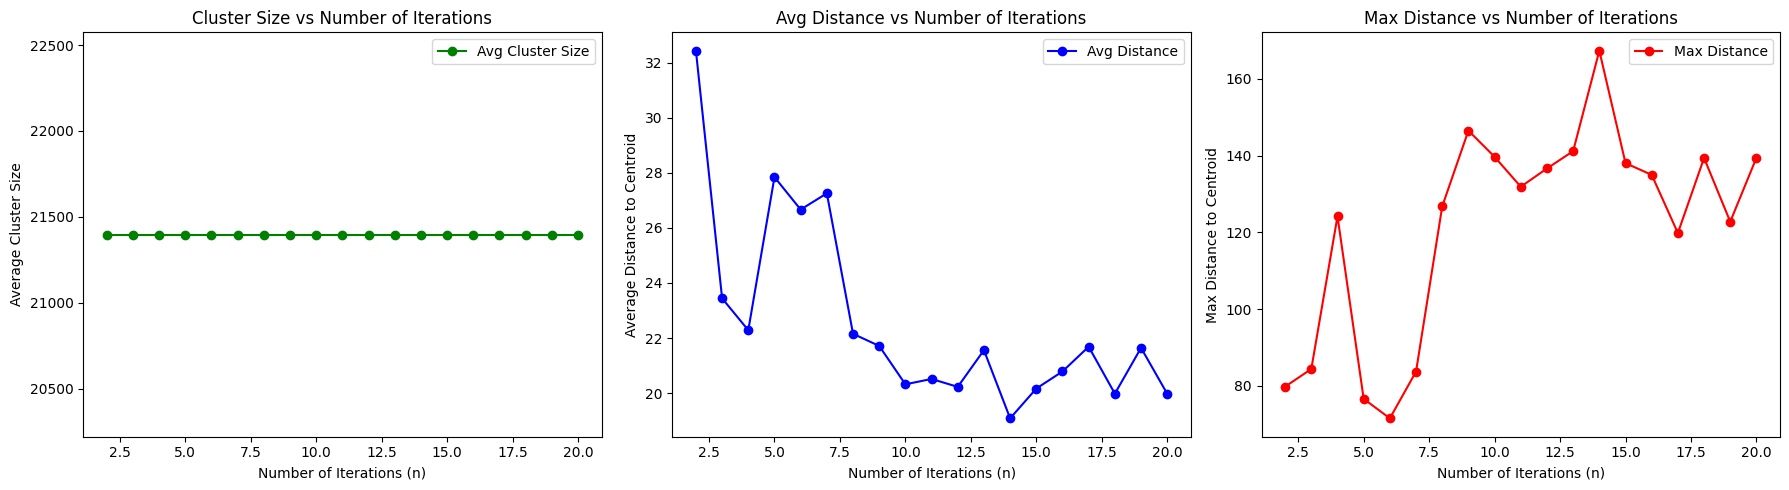

In [4]:
# results for different number of iterations

results = []

for n in range(2, 21):
    clusters, centroids = healthcare_noshows_loop(no_of_iterations=n, no_of_clusters=5, calculate_distance_function=get_euclidean_distance)
    
    cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
    avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_euclidean_distance) for i, cluster in enumerate(clusters)]
    max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_euclidean_distance) for i, cluster in enumerate(clusters)]

    results.append({
        "n": n,
        "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
        "avg_distance": sum(avg_distances) / len(avg_distances),
        "max_distance": max(max_distances)
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ns = [res["n"] for res in results]

# avg cluster size vs number of clusters
avg_cluster_sizes = [res["avg_cluster_size"] for res in results]
axs[0].plot(ns, avg_cluster_sizes, marker='o', linestyle='-', color='g', label="Avg Cluster Size")
axs[0].set_xlabel("Number of Iterations (n)")
axs[0].set_ylabel("Average Cluster Size")
axs[0].set_title("Cluster Size vs Number of Iterations")
axs[0].legend()

# avg distance to centroid vs number of clusters
avg_distances = [res["avg_distance"] for res in results]
axs[1].plot(ns, avg_distances, marker='o', linestyle='-', color='b', label="Avg Distance")
axs[1].set_xlabel("Number of Iterations (n)")
axs[1].set_ylabel("Average Distance to Centroid")
axs[1].set_title("Avg Distance vs Number of Iterations")
axs[1].legend()

# max distance to centroid vs number of clusters
max_distances = [res["max_distance"] for res in results]
axs[2].plot(ns, max_distances, marker='o', linestyle='-', color='r', label="Max Distance")
axs[2].set_xlabel("Number of Iterations (n)")
axs[2].set_ylabel("Max Distance to Centroid")
axs[2].set_title("Max Distance vs Number of Iterations")
axs[2].legend()

plt.tight_layout()
plt.show()

**Conclusion**: The best number of iterations seems to be around 7.

## Check the influence of distance calculating method

In [5]:
# results for euclidean vs manhattan distance calculation

results = []

clusters, centroids = healthcare_noshows_loop(no_of_iterations=10, no_of_clusters=5, calculate_distance_function=get_euclidean_distance)

cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]
max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]

results.append({
    "method": "Euclidean",
    "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
    "avg_distance": sum(avg_distances) / len(avg_distances),
    "max_distance": max(max_distances)
})

clusters, centroids = healthcare_noshows_loop(no_of_iterations=10, no_of_clusters=5, calculate_distance_function=get_manhattan_distance)

cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_manhattan_distance) for i, cluster in enumerate(clusters)]
max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [], get_manhattan_distance) for i, cluster in enumerate(clusters)]

results.append({
    "method": "Manhattan",
    "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
    "avg_distance": sum(avg_distances) / len(avg_distances),
    "max_distance": max(max_distances)
})

for result in results:
    print(f"Method: {result["method"]}")
    print(f"\tAvg cluster size: {result["avg_cluster_size"]}")
    print(f"\tAvg distance from centroid: {result["avg_distance"]}")
    print(f"\tMax distance from centroid: {result["max_distance"]}")

Method: Euclidean
	Avg cluster size: 21397.4
	Avg distance from centroid: 16.10852591437424
	Max distance from centroid: 110.15529263928279
Method: Manhattan
	Avg cluster size: 21397.4
	Avg distance from centroid: 30.92145595050432
	Max distance from centroid: 207.3484602067048


**Conclusion**: The Euclidean method produces better results.

## Final data analysis

In [12]:
clusters, centroids = healthcare_noshows_loop(no_of_iterations=7, no_of_clusters=5, calculate_distance_function=get_euclidean_distance)

centroids = denormalize_data(centroids, healthcare_noshows_denormalize_row)

print('"Gender","Age","Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","Showed_up","Date.diff"')
for i, centroid in enumerate(centroids):
    print(f"SIZE OF CLUSTER NO {i}: {len(clusters[i])}")
    print(f"CENTROID NO {i}: {centroid}")

"Gender","Age","Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","Showed_up","Date.diff"
SIZE OF CLUSTER NO 0: 1603
CENTROID NO 0: ['F', 65.05994005994006, 'JARDIM DA PENHA', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 84.44655344655345]
SIZE OF CLUSTER NO 1: 33215
CENTROID NO 1: ['F', 62.11946637951663, 'JABOUR', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 5.817659727207466]
SIZE OF CLUSTER NO 2: 9058
CENTROID NO 2: ['F', 41.179318313113804, 'JUCUTUQUARA', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 41.43604852686308]
SIZE OF CLUSTER NO 3: 33738
CENTROID NO 3: ['F', 21.901735446050264, 'FRADINHOS', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 7.174270125950432]
SIZE OF CLUSTER NO 4: 29373
CENTROID NO 4: ['F', 28.746408070378045, 'SANTA TEREZA', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 6.889711626643117]


In [13]:
clusters, centroids = healthcare_noshows_loop(no_of_iterations=7, no_of_clusters=9, calculate_distance_function=get_euclidean_distance)

centroids = denormalize_data(centroids, healthcare_noshows_denormalize_row)

print('"Gender","Age","Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","Showed_up","Date.diff"')
for i, centroid in enumerate(centroids):
    print(f"SIZE OF CLUSTER NO {i}: {len(clusters[i])}")
    print(f"CENTROID NO {i}: {centroid}")

"Gender","Age","Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","Showed_up","Date.diff"
SIZE OF CLUSTER NO 0: 1
CENTROID NO 0: ['M', 99, 'DO CABRAL', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 38]
SIZE OF CLUSTER NO 1: 4494
CENTROID NO 1: ['F', 54.998806682577566, 'SANTA LUÍZA', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 37.11296738265712]
SIZE OF CLUSTER NO 2: 15224
CENTROID NO 2: ['F', 58.353313353313354, 'CRUZAMENTO', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 7.276057276057276]
SIZE OF CLUSTER NO 3: 18174
CENTROID NO 3: ['F', 38.405685170286944, 'JESUS DE NAZARETH', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 4.7496379726468225]
SIZE OF CLUSTER NO 4: 20596
CENTROID NO 4: ['F', 62.92201246334311, 'REDENÇÃO', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 6.201887829912024]
SIZE OF CLUSTER NO 5: 7491
CENTROID NO 5: ['F', 18.936938127974617, 'JARDIM DA PEN